#References : 

https://www.kaggle.com/selener/multi-class-text-classification-tfidf

https://www.kaggle.com/darkcore/multi-class-text-classification-with-cnn

#Must Read :

###NLP Blog : 

Tokenization : https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/

**Text Cleaning and Preprocessing:**   :  https://www.analyticsvidhya.com/blog/2021/06/part-3-step-by-step-guide-to-nlp-text-cleaning-and-preprocessing/



---


**Must Read : Step By Step Guide to NLP Mastery series**
https://www.analyticsvidhya.com/blog/2021/06/part-1-step-by-step-guide-to-master-natural-language-processing-nlp-in-python/



---



**Blog For NLP :**
https://www.machinelearningplus.com/category/nlp/

https://www.machinelearningplus.com/nlp/natural-language-processing-guide/



---


Future Read :

https://www.machinelearningplus.com/nlp/custom-text-classification-spacy/

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# https://drive.google.com/file/d/1a_Is-eD8SE-I1o3Xw6vW2HHijqQia4SM/view?usp=sharing

In [ ]:
id = '1a_Is-eD8SE-I1o3Xw6vW2HHijqQia4SM'

In [ ]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data1 = pd.read_csv('Filename.csv', encoding= 'latin')

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from warnings import filterwarnings
filterwarnings('ignore')
import os

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#Data Overview 

In [ ]:
data1.head()

,Number,Assignment group,Description,Short description,Created,Resolution notes,Priority,Assigned To,Category
0,INC0010711,Network L1,BVABANTWA03 - Node down was triggered for Ci...,BVABANTWA03 - Node down,2019-03-16 01:26:01,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
1,INC0010712,Network L1,BVABANTGRAS01 - Node down was triggered for ...,BVABANTGRAS01 - Node down,2019-03-16 01:27:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
2,INC0010256,Network L2,BVNCLGSWA01 - Node down was triggered for Ci...,BVNCLGSWA01 - Node down,2019-03-04 07:55:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
3,INC0010363,ServiceNow Support,NaN,Test Incident,2019-03-06 12:28:37,testing,P4,NaN,ServiceNow
4,INC0010859,Network L2,Dell Monitor keeps blacking out all day every ...,Dell Monitor Intermittent Blackout,2019-03-21 10:06:43,Mistakenly created.,P3,NaN,Service Desk


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185809 entries, 0 to 185808
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Number             185809 non-null  object
 1   Assignment group   185575 non-null  object
 2   Description        176449 non-null  object
 3   Short description  185599 non-null  object
 4   Created            185809 non-null  object
 5   Resolution notes   185039 non-null  object
 6   Priority           185583 non-null  object
 7   Assigned To        150350 non-null  object
 8   Category           185536 non-null  object
dtypes: object(9)
memory usage: 12.8+ MB


In [ ]:
len(data1.Description.unique())

127531

In [ ]:
len(data1['Short description'].unique())

93866

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
data1['Descript'] = data1['Short description']+' '+data1['Description']

In [ ]:
# data1['Descript'] = data1['Short description']

In [ ]:
data1.head()

,Number,Assignment group,Description,Short description,Created,Resolution notes,Priority,Assigned To,Category,Descript
0,INC0010711,Network L1,BVABANTWA03 - Node down was triggered for Ci...,BVABANTWA03 - Node down,2019-03-16 01:26:01,Resolution notes copied from Parent Incident: ...,P2,NaN,Network,BVABANTWA03 - Node down BVABANTWA03 - Node...
1,INC0010712,Network L1,BVABANTGRAS01 - Node down was triggered for ...,BVABANTGRAS01 - Node down,2019-03-16 01:27:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network,BVABANTGRAS01 - Node down BVABANTGRAS01 - ...
2,INC0010256,Network L2,BVNCLGSWA01 - Node down was triggered for Ci...,BVNCLGSWA01 - Node down,2019-03-04 07:55:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network,BVNCLGSWA01 - Node down BVNCLGSWA01 - Node...
3,INC0010363,ServiceNow Support,NaN,Test Incident,2019-03-06 12:28:37,testing,P4,NaN,ServiceNow,NaN
4,INC0010859,Network L2,Dell Monitor keeps blacking out all day every ...,Dell Monitor Intermittent Blackout,2019-03-21 10:06:43,Mistakenly created.,P3,NaN,Service Desk,Dell Monitor Intermittent Blackout Dell Monito...


In [ ]:
data = data1[['Assignment group','Descript']]
data.head()

,Assignment group,Descript
0,Network L1,BVABANTWA03 - Node down BVABANTWA03 - Node...
1,Network L1,BVABANTGRAS01 - Node down BVABANTGRAS01 - ...
2,Network L2,BVNCLGSWA01 - Node down BVNCLGSWA01 - Node...
3,ServiceNow Support,NaN
4,Network L2,Dell Monitor Intermittent Blackout Dell Monito...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185809 entries, 0 to 185808
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Assignment group  185575 non-null  object
 1   Descript          176448 non-null  object
dtypes: object(2)
memory usage: 2.8+ MB


In [ ]:
data.rename(columns= {'Assignment group':'category', 'Descript' : 'text'}, inplace= True)
data.columns

Index(['category', 'text'], dtype='object')

In [ ]:
data.category.value_counts()

Monitor IIMSS                   53164
L1 English                      25677
Server L1                       24857
Deskside NA                     11443
Network L1                       8156
                                ...  
Safety - BVSafe                     1
Incident Management                 1
IT Security - Direct Defense        1
IT Div Manager Corp                 1
Pre Go-Live Testing                 1
Name: category, Length: 133, dtype: int64

In [ ]:
data.describe()

,category,text
count,185575,176448
unique,133,128094
top,Monitor IIMSS,BNGK-PSVORA-01 - BV_Linux_CPU_Utilization_Cr...
freq,53164,3727


From Above stat we conclude that 128094 entries are Unique/ not duplicate however 57714 entries are duplicated so i will Drop those

In [ ]:
# Create a code to check for the most duplicated entry  

Example from Turkish dataset:

So data contains 431306 lines and 32 unique categories and it seems there is no NaN, right?
But why text label has 4075 (431306-427231) non-unique comments? And we have a "top" comment starts with "Cinemaximum 4 Aydır" so let's check what it is


```
count = 0
cinemaximum4aydir = "Cinemaximum 4 Aydır Bilet Paralarını Bir Türlü İade Etmiyor,"
for text in data.text:
    if cinemaximum4aydir in text[:len(cinemaximum4aydir)]:
        count += 1
print(count)
```


154

In [ ]:
data.text.duplicated(keep="first").value_counts()

False    128095
True      57714
Name: text, dtype: int64

In [ ]:
data.drop_duplicates(subset="text",keep="first",inplace=True,ignore_index=True)
data.describe()

,category,text
count,128073,128094
unique,129,128094
top,L1 English,Monitor - Change Delivery Address Professional...
freq,25308,1


Now no duplicated entries

In [ ]:
values = data['category'].value_counts()
values

L1 English                                            25308
Server L1                                             23472
Monitor IIMSS                                         12001
Deskside NA                                           11008
Engineering - Desktop Applications                     4567
                                                      ...  
Power Bentley - MicroStation (Border Modification)        1
Data Architecture                                         1
Azure DevOps Admin                                        1
Prolog                                                    1
CMDB Full Access                                          1
Name: category, Length: 129, dtype: int64

In [ ]:
to_others = values[values<=2000].index

In [ ]:
data.loc[ data.category.isin(to_others), 'category'] = 'Others' 

In [ ]:
data.category.value_counts()

Others                                    35555
L1 English                                25308
Server L1                                 23472
Monitor IIMSS                             12001
Deskside NA                               11008
Engineering - Desktop Applications         4567
Network L1                                 3493
O365 - Exchange                            3366
EC&C - ProjectWise                         2716
Finance - Oracle Cloud                     2388
GPS  Business Improvement Hybrid Team     2187
Desktop - Productivity Applications        2012
Name: category, dtype: int64

# Now we can visualize Category

https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory

In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.io as pio

init_notebook_mode(True)

fig = px.bar(x=data.category.value_counts().index,y=data.category.value_counts(),color=data.category.value_counts().index,text=data.category.value_counts())
fig.update_traces(hovertemplate="Category:'%{x}' Counted: %{y}")
fig.update_layout(title={"text":"Category Counts","x":0.5,"font":{"size":35}},xaxis={"title":"Category","showgrid":False},yaxis={"title":"Value","showgrid":False},plot_bgcolor="white",width=800,height=500,showlegend=False)
iplot(fig)
fig.show(renderer="colab")

In [ ]:
fig1 = px.pie(data,values=data.category.value_counts(),names=data.category.value_counts().index)
fig1.update_traces(textposition='auto', textinfo='percent+label',marker={"line":{"width":1}},hoverinfo='label+percent',hole=0.4)
fig1.update_layout(annotations=[{"text":"Percentages","showarrow":False,"font_size":17}])
iplot(fig1)
fig1.show(renderer="colab")


#Word Overview 
Let's start with word lis

In [ ]:
data.text

0         BVABANTWA03  -  Node down BVABANTWA03  -  Node...
1         BVABANTGRAS01  -  Node down BVABANTGRAS01  -  ...
2         BVNCLGSWA01  -  Node down BVNCLGSWA01  -  Node...
3                                                       NaN
4         Dell Monitor Intermittent Blackout Dell Monito...
                                ...                        
128090    Configure and ship additional WAP for Good Hop...
128091    Need a 24 port Meraki switch and 2 WAP's confi...
128092    User reported multiple slow wired network loca...
128093    desk port - cannot access BV corp network from...
128094    Due to some power flucation the ethenet port n...
Name: text, Length: 128095, dtype: object

# Below error is caused by some NAN values in the dataset so its better to get rid of them

https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split

In [ ]:
import re

wordList = list()
for i in range(len(data)):
    temp = data.text[i].split()
    for k in temp:
        k = re.sub("[^a-zA-Z]","",k)
        if k != "":
            wordList.append(k)

AttributeError: ignored

In [ ]:
data.dropna(axis=0, how='any', inplace=True)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 128072 entries, 0 to 128094
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  128072 non-null  object
 1   text      128072 non-null  object
dtypes: object(2)
memory usage: 2.9+ MB


In [ ]:
len(data)

128072

Analyse the below Error:

In [ ]:
import re

wordList = list()
for i in range(len(data)):
    temp = data['text'][i].split()
    for k in temp:
        k = re.sub("[^a-zA-Z]","",k)
        if k != "":
            wordList.append(k) 

KeyError: ignored

In [ ]:
data['text'][4]

'Dell Monitor Intermittent Blackout Dell Monitor keeps blacking out all day every 5-10 secs'

In [ ]:
wordList

['BVABANTGRAS',
 'Node',
 'down',
 'BVABANTGRAS',
 'Node',
 'down',
 'was',
 'triggered',
 'for',
 'City',
 'Lontar',
 'Region',
 'APAC',
 'for',
 'device',
 'BVABANTGRASnabvcorpnet',
 'BVABANTGRAS',
 'Node',
 'down',
 'BVABANTGRAS',
 'Node',
 'down',
 'was',
 'triggered',
 'for',
 'City',
 'Lontar',
 'Region',
 'APAC',
 'for',
 'device',
 'BVABANTGRASnabvcorpnet',
 'BVABANTGRAS',
 'Node',
 'down',
 'BVABANTGRAS',
 'Node',
 'down',
 'was',
 'triggered',
 'for',
 'City',
 'Lontar',
 'Region',
 'APAC',
 'for',
 'device',
 'BVABANTGRASnabvcorpnet',
 'BVABANTGRAS',
 'Node',
 'down',
 'BVABANTGRAS',
 'Node',
 'down',
 'was',
 'triggered',
 'for',
 'City',
 'Lontar',
 'Region',
 'APAC',
 'for',
 'device',
 'BVABANTGRASnabvcorpnet',
 'BVABANTGRAS',
 'Node',
 'down',
 'BVABANTGRAS',
 'Node',
 'down',
 'was',
 'triggered',
 'for',
 'City',
 'Lontar',
 'Region',
 'APAC',
 'for',
 'device',
 'BVABANTGRASnabvcorpnet',
 'BVABANTGRAS',
 'Node',
 'down',
 'BVABANTGRAS',
 'Node',
 'down',
 'was',
 'tr

In [ ]:
data.head()

,category,text
0,Network L1,BVABANTWA03 - Node down BVABANTWA03 - Node...
1,Network L1,BVABANTGRAS01 - Node down BVABANTGRAS01 - ...
2,Others,BVNCLGSWA01 - Node down BVNCLGSWA01 - Node...
4,Others,Dell Monitor Intermittent Blackout Dell Monito...
5,Others,XRPI_WIESBADEN - Node down XRPI_WIESBADEN -...


In [ ]:
data.describe()

,category,text
count,128072,128072
unique,12,128072
top,Others,BVNFTL2SAFEWA01 - Node down BVNFTL2SAFEIR01 ...
freq,35554,1


In [ ]:
data['text']

0         BVABANTWA03  -  Node down BVABANTWA03  -  Node...
1         BVABANTGRAS01  -  Node down BVABANTGRAS01  -  ...
2         BVNCLGSWA01  -  Node down BVNCLGSWA01  -  Node...
4         Dell Monitor Intermittent Blackout Dell Monito...
5         XRPI_WIESBADEN  -  Node down XRPI_WIESBADEN  -...
                                ...                        
128090    Configure and ship additional WAP for Good Hop...
128091    Need a 24 port Meraki switch and 2 WAP's confi...
128092    User reported multiple slow wired network loca...
128093    desk port - cannot access BV corp network from...
128094    Due to some power flucation the ethenet port n...
Name: text, Length: 128072, dtype: object

In [ ]:
data.head()

,category,text
0,Network L1,BVABANTWA03 - Node down BVABANTWA03 - Node...
1,Network L1,BVABANTGRAS01 - Node down BVABANTGRAS01 - ...
2,Others,BVNCLGSWA01 - Node down BVNCLGSWA01 - Node...
4,Others,Dell Monitor Intermittent Blackout Dell Monito...
5,Others,XRPI_WIESBADEN - Node down XRPI_WIESBADEN -...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128072 entries, 0 to 128094
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  128072 non-null  object
 1   text      128072 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


# Using Spacy

https://stackoverflow.com/questions/45605946/how-to-do-text-pre-processing-using-spacy

In [ ]:
import spacy #load spacy
nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])
stops = stopwords.words("english")

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


data['Text_After_Clean'] = data['text'].apply(normalize, lowercase=True, remove_stopwords=True)

In [ ]:
data.head(10)

,category,text,Text_After_Clean
0,Network L1,BVABANTWA03 - Node down BVABANTWA03 - Node...,bvabantwa03 - node bvabantwa03 - node trigger ...
1,Network L1,BVABANTGRAS01 - Node down BVABANTGRAS01 - ...,bvabantgras01 - node bvabantgras01 - node trig...
2,Others,BVNCLGSWA01 - Node down BVNCLGSWA01 - Node...,bvnclgswa01 - node bvnclgswa01 - node trigger ...
4,Others,Dell Monitor Intermittent Blackout Dell Monito...,dell monitor intermittent blackout dell monito...
5,Others,XRPI_WIESBADEN - Node down XRPI_WIESBADEN -...,xrpi_wiesbaden - node xrpi_wiesbaden - node tr...
6,Network L1,BVABANTGRCS01 - Node down BVABANTGRCS01 - ...,bvabantgrcs01 - node bvabantgrcs01 - node trig...
7,Others,HP-COLSTXSW2 - Node down HP-COLSTXSW2 - No...,hp - colstxsw2 - node hp - colstxsw2 - node tr...
8,Others,BVECHESWA01 - Node down BVECHESWA01 - Node...,bvecheswa01 - node bvecheswa01 - node trigger ...
9,Network L1,BVABANTWA01 - Node down BVABANTWA01 - Node...,bvabantwa01 - node bvabantwa01 - node trigger ...
10,Network L1,BVABANTWA04 - Node down BVABANTWA04 - Node...,bvabantwa04 - node bvabantwa04 - node trigger ...


Drop the unrequired column and rename

In [ ]:
data = data[['category','Text_After_Clean']]
data.head()

,category,Text_After_Clean
0,Network L1,bvabantwa03 - node bvabantwa03 - node trigger ...
1,Network L1,bvabantgras01 - node bvabantgras01 - node trig...
2,Others,bvnclgswa01 - node bvnclgswa01 - node trigger ...
4,Others,dell monitor intermittent blackout dell monito...
5,Others,xrpi_wiesbaden - node xrpi_wiesbaden - node tr...


In [ ]:
data.rename(columns= {'Text_After_Clean' : 'text'}, inplace= True)
data.columns

Index(['category', 'text'], dtype='object')

In [ ]:
data.head()

,category,text
0,Network L1,bvabantwa03 - node bvabantwa03 - node trigger ...
1,Network L1,bvabantgras01 - node bvabantgras01 - node trig...
2,Others,bvnclgswa01 - node bvnclgswa01 - node trigger ...
4,Others,dell monitor intermittent blackout dell monito...
5,Others,xrpi_wiesbaden - node xrpi_wiesbaden - node tr...


# NLP Processing


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
import time

ps = PorterStemmer()
stopwordSet = set(stopwords.words('english'))

t = time.time()

def leadMyWord(text):
    text = re.sub('[^a-zA-Z]'," ",text)
    text = text.lower()
    text = word_tokenize(text,language='english')
    text = [word for word in text if not word in stopwordSet]
    text = " ".join(text)
    return text   

textList = data.text.apply(leadMyWord)
textList = list(textList)

print("Before")
print(data["text"][2])
print("After")
print(textList[2])
print("Time Passed")
print(time.time()-t)

Before
bvnclgswa01 - node bvnclgswa01 - node trigger city - college station region - ams device bvnclgswa01
After
bvnclgswa node bvnclgswa node trigger city college station region ams device bvnclgswa
Time Passed
56.29197454452515


In [ ]:
#preparing y

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labelEncode = le.fit_transform(data["category"])
print("LabelEncode")
print(labelEncode)
categorical_y = to_categorical(labelEncode)
print("To_Categorical")
print(categorical_y)

LabelEncode
[ 8  8 10 ... 10 10 10]
To_Categorical
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# ANN Building and Fitting

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#preparing x for ANN
tfidv = TfidfVectorizer(max_features=5000)
x = tfidv.fit_transform(textList)
x.sort_indices()

x_train,x_test,y_train,y_test = train_test_split(x,categorical_y,test_size=0.33,random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
# Below line showed error since utils model is in now tensorflow.keras and not just in keras
from tensorflow.keras.utils import plot_model
from keras.losses import categorical_crossentropy

def build_ann_model(): 
    model = Sequential()
    
    model.add(Dense(units=1024,activation="relu",input_dim=x_train.shape[1]))
    model.add(Dense(units=512,activation="relu"))
    model.add(Dense(units=256,activation="relu"))
    model.add(Dense(units=y_train.shape[1],activation="softmax"))
    
    optimizer = Adam(lr=0.000015,beta_1=0.9,beta_2=0.999)
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)
    return model

In [ ]:
ann_model = build_ann_model()

In [ ]:
ann_history = ann_model.fit(x_train,y_train,epochs=10,batch_size=256,shuffle=True)
ypred = ann_model.predict(x_test)

Epoch 1/10
336/336 [==============================] - 68s 158ms/step - loss: 2.3608 - accuracy: 0.4173
Epoch 2/10
336/336 [==============================] - 53s 158ms/step - loss: 1.5213 - accuracy: 0.5639
Epoch 3/10
336/336 [==============================] - 53s 158ms/step - loss: 1.1944 - accuracy: 0.6150
Epoch 4/10
336/336 [==============================] - 52s 155ms/step - loss: 1.0304 - accuracy: 0.6519
Epoch 5/10
336/336 [==============================] - 53s 156ms/step - loss: 0.7996 - accuracy: 0.7216
Epoch 7/10
336/336 [==============================] - 53s 158ms/step - loss: 0.7274 - accuracy: 0.7500
Epoch 8/10
336/336 [==============================] - 53s 157ms/step - loss: 0.6680 - accuracy: 0.7684
Epoch 9/10
336/336 [==============================] - 52s 155ms/step - loss: 0.6312 - accuracy: 0.7790
Epoch 10/10
336/336 [==============================] - 52s 154ms/step - loss: 0.6085 - accuracy: 0.7836


In [ ]:
ann_history = ann_model.fit(x_train,y_train,epochs=20,batch_size=256,shuffle=True)
ypred = ann_model.predict(x_test)

Epoch 1/20
336/336 [==============================] - 52s 154ms/step - loss: 0.5815 - accuracy: 0.7918
Epoch 2/20
336/336 [==============================] - 52s 153ms/step - loss: 0.5654 - accuracy: 0.7959
Epoch 3/20
336/336 [==============================] - 52s 153ms/step - loss: 0.5522 - accuracy: 0.7995
Epoch 4/20
336/336 [==============================] - 51s 152ms/step - loss: 0.5409 - accuracy: 0.8033
Epoch 5/20
336/336 [==============================] - 51s 152ms/step - loss: 0.5309 - accuracy: 0.8051
Epoch 6/20
336/336 [==============================] - 51s 152ms/step - loss: 0.5221 - accuracy: 0.8080
Epoch 7/20
336/336 [==============================] - 51s 151ms/step - loss: 0.5143 - accuracy: 0.8102
Epoch 8/20
336/336 [==============================] - 50s 148ms/step - loss: 0.5071 - accuracy: 0.8124
Epoch 9/20
336/336 [==============================] - 50s 147ms/step - loss: 0.5003 - accuracy: 0.8141
Epoch 10/20
336/336 [==============================] - 50s 149ms/step - l

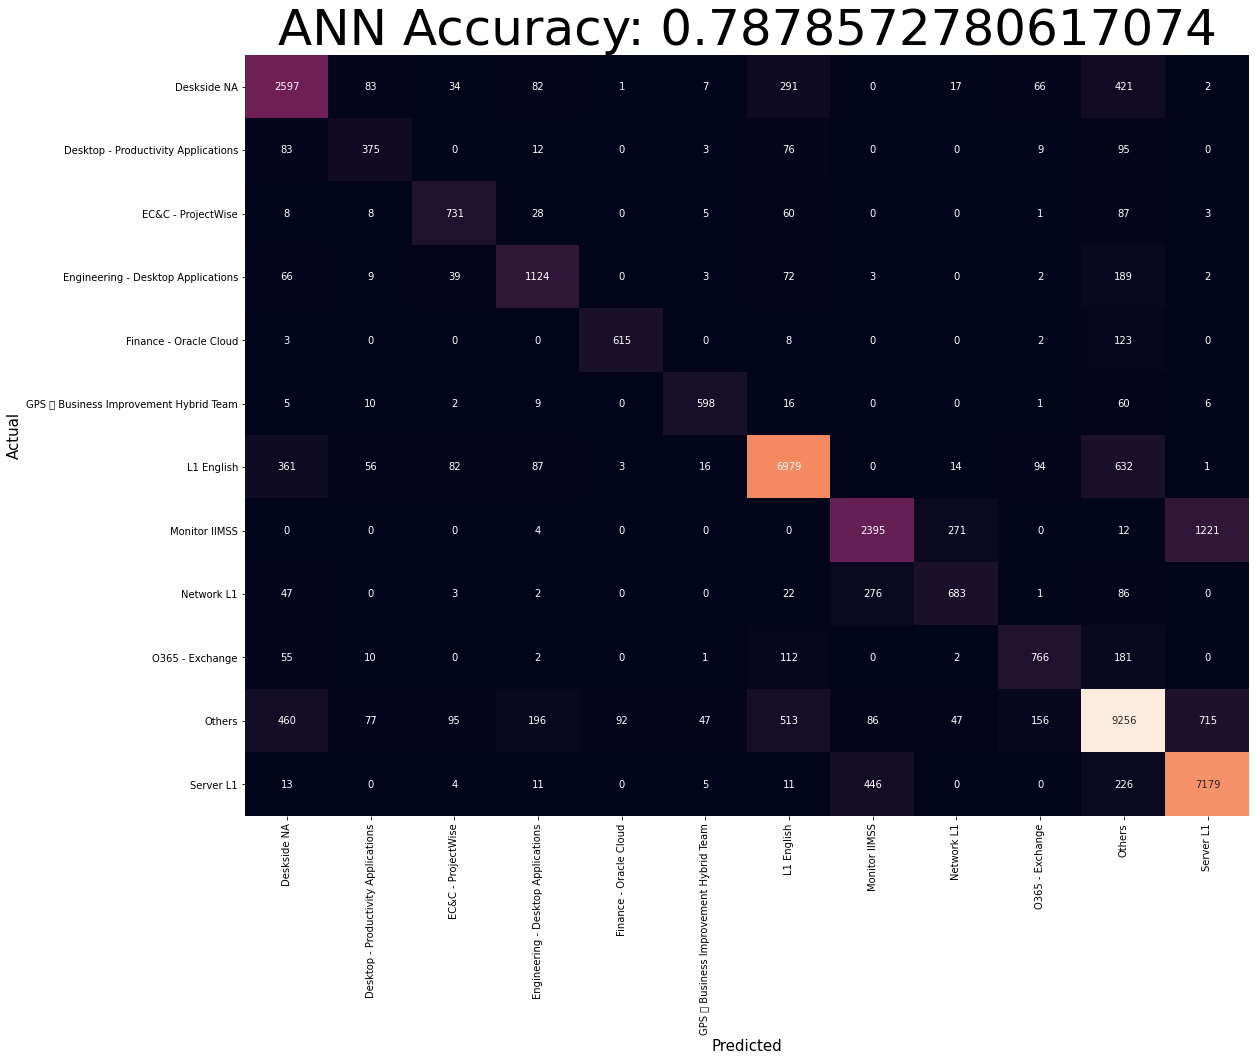

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

ann_accuracy = accuracy_score(y_test.argmax(axis=-1),ypred.argmax(axis=-1))
#print("ANN Accuracy:",ann_accuracy)
ann_cn = confusion_matrix(y_test.argmax(axis=-1),ypred.argmax(axis=-1))
plt.subplots(figsize=(18,14))
sns.heatmap(ann_cn,annot=True,fmt="1d",cbar=False,xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("ANN Accuracy: {}".format(ann_accuracy),fontsize=50)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.show()

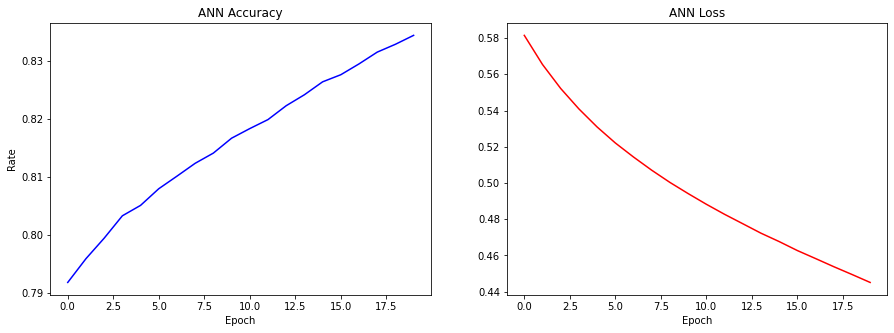

In [ ]:
fig3, axe1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axe1[0].plot(ann_history.history["accuracy"],label="accuracy",color="blue")
axe1[1].plot(ann_history.history["loss"],label="loss",color="red")
axe1[0].title.set_text("ANN Accuracy")
axe1[1].title.set_text("ANN Loss")
axe1[0].set_xlabel("Epoch")
axe1[1].set_xlabel("Epoch")
axe1[0].set_ylabel("Rate")
plt.show()

# CNN Building and Fitting 

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

#preparing x for CNN
MAX_FEATURES = 10001

onehot_corpus = []
for text in textList:
    onehot_corpus.append(one_hot(text,MAX_FEATURES))
    
maxTextLen = 0
for text in textList:
    word_token=word_tokenize(text)
    if(maxTextLen < len(word_token)):
        maxTextLen = len(word_token)
        
print("Max number of words : ",maxTextLen)

padded_corpus=pad_sequences(onehot_corpus,maxlen=maxTextLen,padding='post')
x_train2,x_test2,y_train2,y_test2 = train_test_split(padded_corpus,categorical_y,test_size=0.33,random_state=42)

Max number of words :  4640


In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten
def build_cnn_model():
    model = Sequential()
    
    model.add(Embedding(MAX_FEATURES, 100, input_length=maxTextLen))


    model.add(Conv1D(64, 2, padding='same', activation='relu'))
    model.add(MaxPooling1D(2))
    #model.add(MaxPooling1D(2))
    
    model.add(Flatten())
    
    model.add(Dense(units=1024,activation="relu"))
    model.add(Dense(units=512,activation="relu"))
    
    model.add(Dense(units=y_train2.shape[1],activation="softmax"))
    
    optimizer = Adam(lr=0.000055,beta_1=0.9,beta_2=0.999)
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)
    return model

In [ ]:
cnn_model = build_cnn_model()

In [ ]:
cnn_history = cnn_model.fit(x_train2,y_train2,epochs=10,batch_size=1280,shuffle=True)
ypred2 = cnn_model.predict(x_test2) 

Epoch 1/10


In [ ]:
cnn_accuracy = accuracy_score(y_test2.argmax(axis=-1),ypred2.argmax(axis=-1))
#print("CNN Accuracy:",cnn_accuracy)
cnn_cn = confusion_matrix(y_test2.argmax(axis=-1),ypred2.argmax(axis=-1))
plt.subplots(figsize=(18,14))
sns.heatmap(cnn_cn,annot=True,fmt="1d",cbar=False,xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("CNN Accuracy: {}".format(cnn_accuracy),fontsize=50)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.show()

In [ ]:
fig3, axe1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axe1[0].plot(cnn_history.history["accuracy"],label="accuracy",color="blue")
axe1[1].plot(cnn_history.history["loss"],label="loss",color="red")
axe1[0].title.set_text("CNN Accuracy")
axe1[1].title.set_text("CNN Loss")
axe1[0].set_xlabel("Epoch")
axe1[1].set_xlabel("Epoch")
axe1[0].set_ylabel("Rate")
plt.show()

In [ ]:
def ann_predict(text):
    puretext = leadMyWord(text)
    vector = tfidv.transform([puretext])
    vector.sort_indices()
    predicted = ann_model.predict(vector)
    predicted_category = predicted.argmax(axis=1)
    return le.classes_[predicted_category]
def cnn_predict(text):
    puretext = leadMyWord(text)
    onehottext = one_hot(puretext,MAX_FEATURES)
    text_pad = pad_sequences([onehottext],maxlen=maxTextLen,padding='post')
    predicted = cnn_model.predict(text_pad)
    predicted_category = predicted.argmax(axis=1)
    return le.classes_[predicted_category]
    
for _ in range(10):
    randint = np.random.randint(len(data))
    text = data.text[randint]  
    print("  Text")
    print("-"*8)
    print(text)
    print("-"*20)
    print("Actual Category: {}".format(data.category[randint]))
    print("ANN Predicted Category: {}".format(ann_predict(text)[0]))
    print("CNN Predicted Category: {}".format(cnn_predict(text)[0]))
    print("*"*50)